In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_validate

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
data = pd.read_csv('model_data.csv', index_col='PID')
data.shape

(2579, 25)

#### Independent Variable (y)

In [30]:
y = data.SalePrice.copy()
data.drop('SalePrice', axis=1, inplace=True)

#### Choose Dependents (Use Sector or Neighborhood) (Use ALLSF, or split columns)

In [31]:
data.columns

Index(['MSSubClass', 'GarageCars', 'GarageType', 'BsmtQual', 'Foundation',
       'PavedDrive', 'TotalBsmtSF', 'AllBathBsmt', 'AllBathAbv',
       'TotRmsAbvGrd', 'Fireplaces', 'HeatingQC', 'Neighborhood', 'Sector',
       'YearBuilt', 'OverallQual', 'LotFrontage', 'DfromWalmart', '1stFlrSF',
       '2ndFlrSF', 'GarageArea', 'PorchArea', 'ALLSF', 'HasPool'],
      dtype='object')

* Sectors & ALLSF

In [32]:
data_1 = data.drop(['Neighborhood','1stFlrSF', '2ndFlrSF', 'GarageArea', 'PorchArea', 'TotalBsmtSF'],axis=1)

* Sectors & Split SF

In [33]:
data_2 = data.drop(['Neighborhood','ALLSF'],axis=1)

* Neighborhood & ALLSF

In [34]:
data_3 = data.drop(['Sector','1stFlrSF', '2ndFlrSF', 'GarageArea', 'PorchArea', 'TotalBsmtSF'],axis=1)

* Neighborhood & Split SF

In [35]:
data_4 = data.drop(['Sector','ALLSF'],axis=1)

## 📉 Multiple Regression 1

#### Data_1

In [36]:
lasso = Lasso(max_iter=10000)

data_dum = pd.get_dummies(data_1, drop_first=True)
scores = cross_validate(lasso, data_dum, np.log10(y), cv=4)
np.mean(scores['test_score'])

0.6441628927347836

#### Data_2

In [37]:
data_dum = pd.get_dummies(data_2, drop_first=True)
scores = cross_validate(lasso, data_dum, np.log10(y), cv=4)
np.mean(scores['test_score'])

0.6435204263023244

#### Data_3

In [38]:
data_dum = pd.get_dummies(data_3, drop_first=True)
scores = cross_validate(lasso, data_dum, np.log10(y), cv=4)
np.mean(scores['test_score'])

0.6441628927347836

#### Data_4

In [39]:
data_dum = pd.get_dummies(data_4, drop_first=True)
scores = cross_validate(lasso, data_dum, np.log10(y), cv=4)
np.mean(scores['test_score'])

0.6435204263023244

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_dum, y, test_size=0.3)

In [41]:
lasso.fit(X_train,np.log10(y_train))
lasso.score(X_test,np.log10(y_test))

0.7096261637874854

In [42]:
lasso.set_params(normalize=True, max_iter=10000, random_state=44)
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': True,
 'positive': False,
 'precompute': False,
 'random_state': 44,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [43]:
#try different alphas
alphas = np.linspace(0,0.002,100)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, np.log10(y_train))
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, np.log10(y_train)))
    R2_test.append(lasso.score(X_test, np.log10(y_test)))

<ipython-input-43-02d8d1909f26>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, np.log10(y_train))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5686080415255788, tolerance: 0.005217255246779685
  model = cd_fast.enet_coordinate_descent(


In [44]:
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)
coefs_lasso.head(2)

,GarageCars,TotalBsmtSF,AllBathBsmt,AllBathAbv,TotRmsAbvGrd,Fireplaces,YearBuilt,OverallQual,LotFrontage,DfromWalmart,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0.00000,0.008961,0.000030,0.025961,0.005282,-0.000387,0.010623,0.000518,0.032788,0.000036,0.011035,...,0.017201,0.029955,0.007033,0.00573,-0.001052,-0.022407,0.034987,0.061272,0.029033,0.033128
0.00002,0.008716,0.000037,0.026400,0.004751,0.000000,0.011174,0.000707,0.035620,0.000034,0.004042,...,0.008366,0.026078,-0.005843,-0.00000,0.000000,-0.015395,0.021303,0.049034,0.013992,0.012252


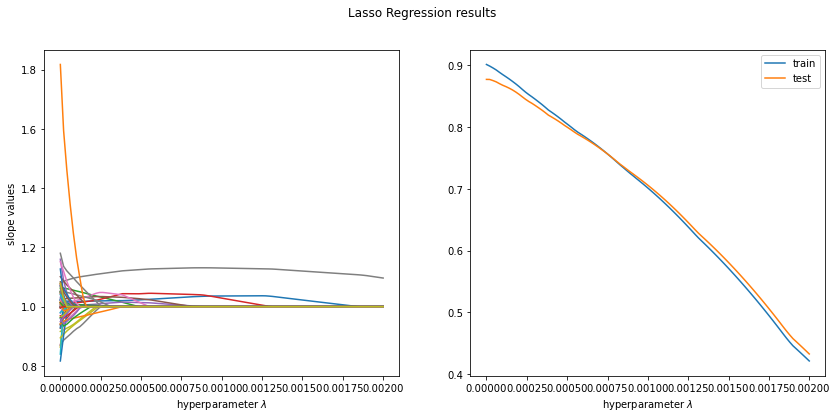

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)

In [47]:
vif = pd.DataFrame()
vif['var'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

In [50]:
# VIFs over 10
vif[vif.VIF>10]

,var,VIF
0,GarageCars,46.054543
1,TotalBsmtSF,42.320231
3,AllBathAbv,32.441048
4,TotRmsAbvGrd,69.582202
6,YearBuilt,654.128092
7,OverallQual,71.007338
9,DfromWalmart,128.670884
10,1stFlrSF,70.263678
11,2ndFlrSF,12.746078
12,GarageArea,34.632558


#### Check Corr Heatmap for Continuous Variables

<AxesSubplot:>

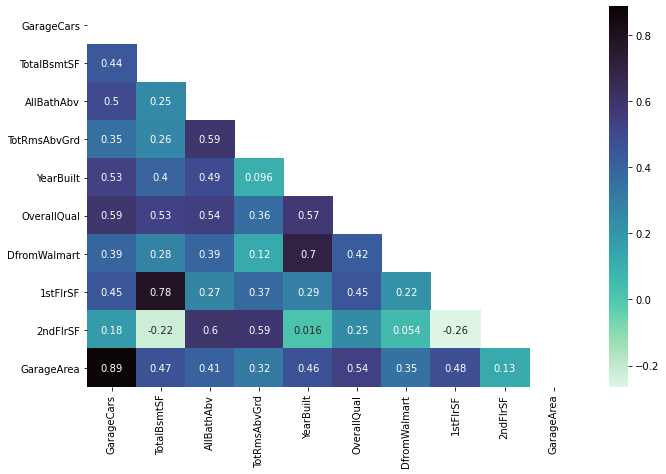

In [52]:
corr = data[['GarageCars','TotalBsmtSF','AllBathAbv','TotRmsAbvGrd','YearBuilt','OverallQual',
            'DfromWalmart','1stFlrSF','2ndFlrSF','GarageArea']].corr()

# Hide upper redundant heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(corr, mask=mask, annot=True, cmap='mako_r')

### DistancefromWalmart & YearBuilt high Correlation??

<AxesSubplot:xlabel='DfromWalmart', ylabel='YearBuilt'>

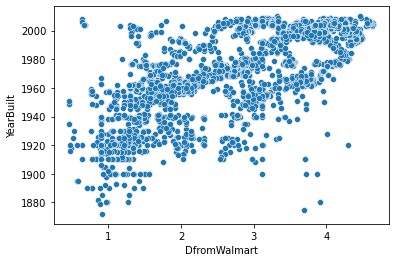

In [53]:
sns.scatterplot(x='DfromWalmart',y='YearBuilt',data=data)

In [60]:
lm = LinearRegression()
lm.fit(data[['DfromWalmart']],np.log10(y))
print(lm.score(data[['DfromWalmart']],np.log10(y)))
lm.fit(data[['YearBuilt']],np.log10(y))
print(lm.score(data[['YearBuilt']],np.log10(y)))

0.2093795637271657
0.35699696242540935


In [62]:
# Drop Distance from Walmart
data.drop('DfromWalmart',axis=1, inplace=True)

### AllBathAbv & TotalRmsAbv high Correlation
* Subtract bathrooms from TotalRooms

In [65]:
data.TotRmsAbvGrd = np.floor(data.TotRmsAbvGrd - data.AllBathAbv)

### GarageArea & GarageCars high Correlation

In [58]:
lm = LinearRegression()
lm.fit(data[['GarageArea']],np.log10(y))
lm.score(data[['GarageArea']],np.log10(y))

0.41650204802415003

In [59]:
lm = LinearRegression()
lm.fit(data[['GarageCars']],np.log10(y))
lm.score(data[['GarageCars']],np.log10(y))

0.45677789237368716

#### Try PCA to combine Features
'GarageCars', 'GarageArea'<br>

In [97]:
from sklearn.decomposition import PCA
pca_data = data[['GarageCars','GarageArea']]

pca = PCA()
pca.fit(pca_data)
np.round(pca.explained_variance_ratio_,5)

array([1., 0.])

In [98]:
# Keep 1 PCA transformed GarageData
new_data = data.drop(['GarageCars','GarageArea'],axis=1)
pca.set_params(n_components=1)
new_data = pd.concat([new_data.reset_index(),pd.DataFrame(pca.fit_transform(pca_data))],axis=1)
new_data = new_data.rename(columns={0:'GaragePCA'}).set_index('PID')

In [99]:
new_data.head()

,MSSubClass,GarageType,BsmtQual,Foundation,PavedDrive,TotalBsmtSF,AllBathBsmt,AllBathAbv,TotRmsAbvGrd,Fireplaces,...,Sector,YearBuilt,OverallQual,LotFrontage,1stFlrSF,2ndFlrSF,PorchArea,ALLSF,HasPool,GaragePCA
PID,,,,,,,,,,,,,,,,,,,,,
526301100,1Fl,Attchd,TA,CBlock,P,1080.0,1.0,1.0,6.0,2,...,NO,1960,6,141.0,1656,0,272,3536.0,0,61.316909
526302030,1Fl,Attchd,TA,CBlock,Y,1178.0,1.0,2.0,3.0,0,...,NO,1954,6,0.0,1293,0,280,3203.0,0,-14.682728
526302040,1Fl,Attchd,TA,CBlock,Y,1008.0,1.0,1.0,4.0,2,...,NO,1956,6,85.0,1024,0,280,2625.0,0,-153.685154
526302110,1Fl,Attchd,Fa,CBlock,Y,882.0,0.0,1.0,4.0,0,...,NO,1956,6,74.0,882,0,0,2266.0,0,35.313944
526302120,1Fl,Attchd,TA,CBlock,Y,1617.0,0.0,1.5,5.0,1,...,NO,1957,5,0.0,1797,0,0,4377.0,0,496.317923


#### Try PCA to combine Features
'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'<br>

In [100]:
pca_data = data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']]

pca = PCA()
pca.fit(pca_data)
np.round(pca.explained_variance_ratio_,5)

array([0.62116, 0.31151, 0.06733])

In [101]:
# Keep 2 PCA transformed GarageData
new_data = new_data.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'],axis=1)
pca.set_params(n_components=2)
new_data = pd.concat([new_data.reset_index(),pd.DataFrame(pca.fit_transform(pca_data))],axis=1)

In [103]:
new_data = new_data.rename(columns={0:'sizePCA_1',1:'sizePCA_2'}).set_index('PID')
new_data.head()

,MSSubClass,GarageType,BsmtQual,Foundation,PavedDrive,AllBathBsmt,AllBathAbv,TotRmsAbvGrd,Fireplaces,HeatingQC,...,Sector,YearBuilt,OverallQual,LotFrontage,PorchArea,ALLSF,HasPool,GaragePCA,sizePCA_1,sizePCA_2
PID,,,,,,,,,,,,,,,,,,,,,
526301100,1Fl,Attchd,TA,CBlock,P,1.0,1.0,6.0,2,Fa,...,NO,1960,6,141.0,272,3536.0,0,61.316909,476.763304,-174.221194
526302030,1Fl,Attchd,TA,CBlock,Y,1.0,2.0,3.0,0,Gd,...,NO,1954,6,0.0,280,3203.0,0,-14.682728,323.326681,-225.369411
526302040,1Fl,Attchd,TA,CBlock,Y,1.0,1.0,4.0,2,TA,...,NO,1956,6,85.0,280,2625.0,0,-153.685154,43.888998,-344.908277
526302110,1Fl,Attchd,Fa,CBlock,Y,0.0,1.0,4.0,0,TA,...,NO,1956,6,74.0,0,2266.0,0,35.313944,-128.389987,-420.211117
526302120,1Fl,Attchd,TA,CBlock,Y,0.0,1.5,5.0,1,Fa,...,NO,1957,5,0.0,0,4377.0,0,496.317923,929.186689,39.139784


## 📉 Multiple Regression 2

In [106]:
data_final = new_data.drop(['Sector','ALLSF'],axis=1)

In [107]:
data_dum = pd.get_dummies(data_final, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(data_dum, y, test_size=0.3)

In [108]:
lasso = Lasso()
lasso.set_params(normalize=True, max_iter=10000, random_state=44)
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': True,
 'positive': False,
 'precompute': False,
 'random_state': 44,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [109]:
#try different alphas
alphas = np.linspace(0,0.002,100)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, np.log10(y_train))
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, np.log10(y_train)))
    R2_test.append(lasso.score(X_test, np.log10(y_test)))

<ipython-input-109-02d8d1909f26>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, np.log10(y_train))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.549313149117787, tolerance: 0.005215151102849098
  model = cd_fast.enet_coordinate_descent(


In [110]:
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)
coefs_lasso.head(2)

,AllBathBsmt,AllBathAbv,TotRmsAbvGrd,Fireplaces,YearBuilt,OverallQual,LotFrontage,PorchArea,HasPool,GaragePCA,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0.00000,0.028563,0.012187,0.001382,0.015563,0.000315,0.034893,0.000051,0.000045,0.015743,0.000056,...,0.015319,0.021445,-0.024470,-0.025862,-0.001009,-0.021130,0.022396,0.040950,0.018995,0.016199
0.00002,0.027973,0.010807,0.001389,0.016558,0.000542,0.037149,0.000051,0.000046,0.002884,0.000066,...,0.011399,0.018386,-0.010781,-0.008641,0.004558,-0.014227,0.017444,0.034491,0.017384,0.008951


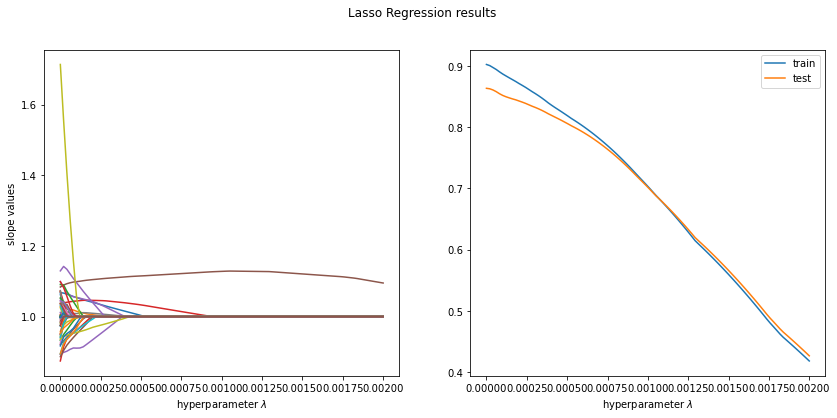

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)

In [114]:
vif = pd.DataFrame()
vif['var'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
# VIFs over 10
vif[vif.VIF>10]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,var,VIF
1,AllBathAbv,35.229122
2,TotRmsAbvGrd,29.444179
4,YearBuilt,560.763313
5,OverallQual,71.089521
17,GarageType_Attchd,110.752833
19,GarageType_BuiltIn,12.288252
21,GarageType_Detchd,48.967629
22,GarageType_NoGarage,11.358207
27,BsmtQual_TA,15.672617
29,Foundation_PConc,10.287236


## 🌲 Prepare for RandomForest

In [23]:
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder

In [24]:
data_le = data_4.copy()
data_le.columns

Index(['MSSubClass', 'GarageCars', 'GarageType', 'BsmtQual', 'Foundation',
       'PavedDrive', 'TotalBsmtSF', 'AllBathBsmt', 'AllBathAbv',
       'TotRmsAbvGrd', 'Fireplaces', 'HeatingQC', 'Neighborhood', 'YearBuilt',
       'OverallQual', 'LotFrontage', 'DfromWalmart', '1stFlrSF', '2ndFlrSF',
       'GarageArea', 'PorchArea'],
      dtype='object')

In [25]:
# Use LabelEncoder on Categorical features
le = LabelEncoder()
data_le.MSSubClass = le.fit_transform(data.MSSubClass)
data_le.GarageType = le.fit_transform(data.GarageType)
data_le.Foundation = le.fit_transform(data.Foundation)
data_le.PavedDrive = le.fit_transform(data.PavedDrive)
data_le.Neighborhood = le.fit_transform(data.Neighborhood)
# Manually Encode Ordinal features
data_le.BsmtQual = data_le.BsmtQual.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,np.NaN:0})
data_le.HeatingQC = data_le.HeatingQC.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_le, y, test_size=0.25)

In [27]:
forest = ensemble.RandomForestRegressor()
forest.set_params(n_estimators=50, random_state=42, max_features=10)
forest.fit(X_train, y_train)
print("The training r2: %.5f" %(forest.score(X_train, y_train)))
print("The test     r2: %.5f" %(forest.score(X_test, y_test)))

The training r2: 0.98374
The test     r2: 0.85969


### Some Overfit?

In [28]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 10,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid_para_forest = [{
    "max_features":np.arange(8,15,1),
    "max_depth": np.linspace(start=6, stop=30, num=13, dtype=int)}]
gs_forest = GridSearchCV(forest, grid_para_forest, scoring='r2', cv=4, n_jobs=-1)
%time gs_forest.fit(X_train, y_train)

Wall time: 31.6 s


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(max_features=10, n_estimators=50,
                                             random_state=42),
             n_jobs=-1,
             param_grid=[{'max_depth': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
                          'max_features': array([ 8,  9, 10, 11, 12, 13, 14])}],
             scoring='r2')

In [31]:
gs_forest.best_params_

{'max_depth': 20, 'max_features': 8}

In [32]:
print("The training r2: %.5f" % (gs_forest.score(X_train, y_train)))
print("The test     r2: %.5f" % (gs_forest.score(X_test, y_test)))

The training r2: 0.98314
The test     r2: 0.86689


In [33]:
pd.DataFrame({'Feat':X_train.columns,'Importance':gs_forest.best_estimator_.feature_importances_}).\
sort_values(by='Importance', ascending=False)

,Feat,Importance
14,OverallQual,0.298260
1,GarageCars,0.095636
13,YearBuilt,0.095492
17,1stFlrSF,0.085871
6,TotalBsmtSF,0.081958
19,GarageArea,0.072357
8,AllBathAbv,0.058487
3,BsmtQual,0.044465
18,2ndFlrSF,0.034376
9,TotRmsAbvGrd,0.022409


## 🚀 Boosting

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.8560322306912452

In [36]:
gbm.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [37]:
grid_para_boost = [{
    "learning_rate":[0.1,0.25,0.5,1],
    "max_depth": np.linspace(start=6, stop=30, num=13, dtype=int)}]
gs_boost = GridSearchCV(gbm, grid_para_boost, scoring='r2', cv=5, n_jobs=-1)
%time gs_boost.fit(X_train, y_train)

Wall time: 1min 26s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.25, 0.5, 1],
                          'max_depth': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
             scoring='r2')

In [38]:
gs_boost.best_params_

{'learning_rate': 0.1, 'max_depth': 6}

In [39]:
print("The training r2: %.5f" % (gs_boost.score(X_train, y_train)))
print("The test     r2: %.5f" % (gs_boost.score(X_test, y_test)))

The training r2: 0.99035
The test     r2: 0.86980
